First, we'll import the two packages we need for this project, pandas and matplotlib.

In [2]:
#Importing packages
import pandas as pd
import matplotlib.pyplot as plt

Once all the packages are imported, we can start to import the csv. Make sure that the csv is in the same directory as your notebook when the cell below is ran.

In [42]:
#Data Processing, using kaggle dataset on covid variants
covid_df = pd.read_csv('covid-variants-raw.csv')
covid_df.head()

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-07-06,Alpha,0,0.0,3
1,Angola,2020-07-06,B.1.1.277,0,0.0,3
2,Angola,2020-07-06,B.1.1.302,0,0.0,3
3,Angola,2020-07-06,B.1.1.519,0,0.0,3
4,Angola,2020-07-06,B.1.160,0,0.0,3


Here we can see the general idea behind the data with countries, dates, variants, and number of sequences. I'm only particularly interested in the Omicron variant, so the following code will first subset the dataframe for rows where the variant is Omicron. Then, I'll change the date column from a string to a datetime object so that we can make a time series. Lastly, I'll subset the countries so that we're only looking at the USA and Japan. Those new dataframes will be saved to csv files.

In [43]:
#Subsetting for rows that only contain the omicron variant
omi_df = covid_df.loc[covid_df['variant'] == 'Omicron']

#Changing the date entries into datetime
omi_df['date'] = pd.to_datetime(omi_df['date'])

#Selecting just the united states
omi_df_us = omi_df.loc[omi_df['location'] == 'United States']
omi_df_ja = omi_df.loc[omi_df['location'] == 'Japan']

#Saving processed data to CSV
omi_df_us.to_csv('omicron_data_usa_cleaned.csv', index=False)
omi_df_ja.to_csv('omicron_data_japan_cleaned.csv', index=False)

#Saving a merged dataframe to CSV
omi_df_us_ja = pd.concat([omi_df_us, omi_df_ja])
omi_df_us_ja.to_csv('omicron_usa_v_japan_cleaned.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 96787 to 44299
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   location             89 non-null     object        
 1   date                 89 non-null     datetime64[ns]
 2   variant              89 non-null     object        
 3   num_sequences        89 non-null     int64         
 4   perc_sequences       89 non-null     float64       
 5   num_sequences_total  89 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 4.9+ KB


<ipython-input-43-379465c0c04f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omi_df['date'] = pd.to_datetime(omi_df['date'])


The next code block will plot the two countries against each other, using a time series of the total number of sequences of omicron. A legend, axes, and title are added for descriptive purposes.

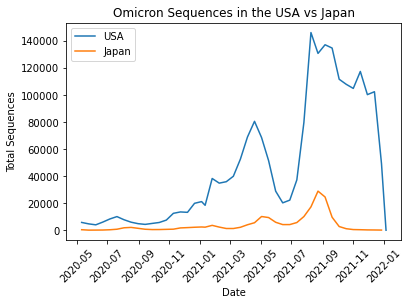

In [37]:
#Plotting the total omicron sequences over time for japan and the USA
plt.plot(omi_df_us.date, omi_df_us.num_sequences_total, label='USA')
plt.plot(omi_df_ja.date, omi_df_ja.num_sequences_total, label = 'Japan')

#Adding legend, axes, title
plt.legend(loc="upper left")
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Total Sequences')
plt.title('Omicron Sequences in the USA vs Japan')

plt.show()